In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from time import time

In [2]:
n_walkers = 20
n_hopsperwalker = 3_000

n_samples = n_walkers * n_hopsperwalker
remove = int(1000)
n_used = n_samples-remove*n_walkers

hop_size = 0.42                                    # set it in order to get alpha of about 0.5

maxdEda = 0.005                         # minimization won't stop until the derivative of energy is smaller than this number
g = 1                                   # damping factor in steepest descent method.
onlyoneiteration = False
#random.seed(10)

In [3]:
run -i Skeleton.py 

$\frac{\mathrm{d}E(\alpha)}{\mathrm{d}\alpha}  = 2 \left( \left<E_L \frac{\mathrm{d}\ln{\psi_T}}{\mathrm{d}\alpha} \right>-E \left< \frac{\mathrm{d}\ln{\psi_T}}{\mathrm{d}\alpha} \right>\right) $

In [4]:
#Helium
alpha = 3
#alpha = 0.209768676824719 #most accurate value we found
list_alpha = [alpha]
list_energies = [-3] # we assign some value to match the legth of the lists. Later we shall remove the first value since it is arbitrarily chosen here.
list_deda = [1]
tic = time()
pdfparameters = list_alpha
functionparameters = list_alpha
variances = [0]
condition = True

while condition:
    pdfparameters = [list_alpha[-1]]
    functionparameters = [list_alpha[-1]]
    dist_x1, dist_y1, dist_z1, dist_x2, dist_y2, dist_z2, accept_ratio, r_rp, rp_r = mcmc_sample_6D(hops=n_samples, pdf = psi2_Helium, pdfparam=pdfparameters)
    dist_x1 = burn_in(states=dist_x1, n_removed=remove)
    dist_y1 = burn_in(states=dist_y1, n_removed=remove)
    dist_z1 = burn_in(states=dist_z1, n_removed=remove)
    dist_x2 = burn_in(states=dist_x2, n_removed=remove)
    dist_y2 = burn_in(states=dist_y2, n_removed=remove)
    dist_z2 = burn_in(states=dist_z2, n_removed=remove)
    #integrate to find energy
    Energy, variance= integrate_6D(func=E_loc, funcparam=functionparameters, dist_x1_=dist_x1, dist_y1_=dist_y1, dist_z1_=dist_z1, dist_x2_=dist_x2, dist_y2_=dist_y2, dist_z2_=dist_z2)
    print("acceptance ratio:",accept_ratio)
    #compute derivative 
    left, _ = integrate_6D(func=E_loc_dlpsida, funcparam=functionparameters, dist_x1_=dist_x1, dist_y1_=dist_y1, dist_z1_=dist_z1, dist_x2_=dist_x2, dist_y2_=dist_y2, dist_z2_=dist_z2)
    right, _ = integrate_6D(func=dlnpsida, funcparam=functionparameters, dist_x1_=dist_x1, dist_y1_=dist_y1, dist_z1_=dist_z1, dist_x2_=dist_x2, dist_y2_=dist_y2, dist_z2_=dist_z2)
    dEda = 2*(left-Energy*right)
    alpha_new = alpha - g*dEda
    #alpha_new = list_alpha[-1] + 0.025
    
    list_energies.append(Energy)
    list_alpha.append(alpha_new)
    
    if abs(dEda) < 0.001:
        condition = False
    if onlyoneiteration:
        condition = False
    alpha = alpha_new
    variances.append(variance)
    list_deda.append(dEda)
    print("alpha old:", list_alpha[-1], "\n alpha new:", alpha_new, "dE/da = ", dEda)

toc = time()
print("Simulation time in seconds", toc-tic)

acceptance ratio: 0.51605
alpha old: 2.989757648649164 
 alpha new: 2.989757648649164 dE/da =  0.010242351350835815
acceptance ratio: 0.5184333333333333
alpha old: 2.9789806973035593 
 alpha new: 2.9789806973035593 dE/da =  0.01077695134560483
acceptance ratio: 0.5143166666666666
alpha old: 2.968438439895816 
 alpha new: 2.968438439895816 dE/da =  0.010542257407743255
acceptance ratio: 0.5117333333333334
alpha old: 2.9579014919200612 
 alpha new: 2.9579014919200612 dE/da =  0.010536947975754912
acceptance ratio: 0.5134166666666666
alpha old: 2.947370423231307 
 alpha new: 2.947370423231307 dE/da =  0.01053106868875403
acceptance ratio: 0.5099
alpha old: 2.936433972680639 
 alpha new: 2.936433972680639 dE/da =  0.010936450550667914
acceptance ratio: 0.51095
alpha old: 2.925315061822804 
 alpha new: 2.925315061822804 dE/da =  0.011118910857835035
acceptance ratio: 0.5149666666666667
alpha old: 2.914667749735801 
 alpha new: 2.914667749735801 dE/da =  0.010647312087003175
acceptance ratio

In [11]:
print("Energy:", Energy, "Variance:", variance)

Energy: -0.49964459178327764 Variance: 0.0007050171041558888


-2.9031602999927704


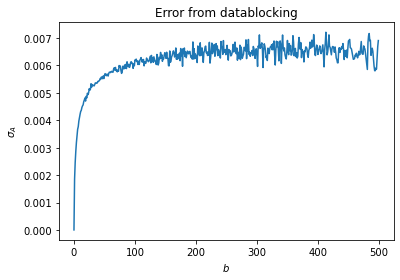

In [5]:
E = E_loc(dist_x1, dist_y1, dist_z1, dist_x2, dist_y2, dist_z2, alpha)
print(np.average(E)-0.0007)
maxb = 500
y = error(E, maxb)
x = np.arange(0, maxb)
figerr = plt.figure()

plt.plot(x,y)
plt.title("Error from datablocking")
plt.xlabel("$b$")
plt.ylabel(r"$\sigma_A$")
plt.show()

#figerr.savefig("Errorwithdatablocking.pdf", bbox_inches='tight')

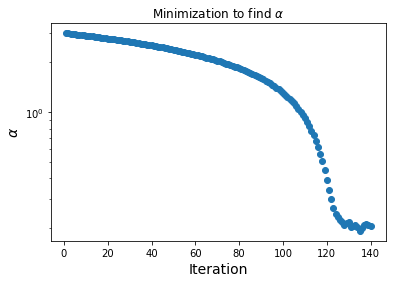

In [6]:
#print(list_energies)
fig = plt.figure()

plt.plot(np.arange(1,len(list_alpha)+1), list_alpha, marker = "o", linestyle = "none")
plt.yscale('log')
plt.title(r"Minimization to find $\alpha$")
plt.xlabel("Iteration", fontsize=14)
plt.ylabel(r"$ \alpha $", fontsize =14)
plt.show()

#fig.savefig("Helium_minimizationfrombelow.pdf", bbox_inches='tight')

In [7]:
#Hydrogen:
#list_alpha = [0.8, 0.9, 1.0, 1.1, 1.2]
#list_alpha = [1]
alpha = 0.8
list_alpha = [alpha]
list_energies = [-3]
list_deda = [1]
tic = time()
variances = [0]
iterations = 20
tic = time()

for i in range(iterations):
    #Hydrogen
    pdfparameters = [list_alpha[-1]]
    functionparameters = [list_alpha[-1]]
    dist_x, dist_y, dist_z, accept_ratio, r_rp, rp_r = mcmc_sample_3D(hops=n_samples, pdf = psi_Hydrogen, pdfparam=pdfparameters)
    dist_x = burn_in(states=dist_x, n_removed=remove)
    dist_y = burn_in(states=dist_y, n_removed=remove)
    dist_z = burn_in(states=dist_z, n_removed=remove)
    #integrate to find energy
    Energy, variance= integrate_3D(func=E_L_Hydrogen, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
    
    #compute derivative 
    left, _ = integrate_3D(func=E_L_Hydrogentimesr, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
    right, _ = integrate_3D(func=negativer, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
    dEda = 2*(left-Energy*right)
    g = 0.1
    alpha_new = alpha - g*dEda
    #alpha_new = list_alpha[-1] + 0.025
    print("alpha old:", list_alpha[-1], "\n alpha new:", alpha_new)
    
    list_energies.append(Energy)
    list_alpha.append(alpha_new)
    alpha = alpha_new
    variances.append(variance)
    list_deda.append(dEda)
#Hydrogen normal calculation
#for i in list_alpha:
#    pdfparameters = [i]
#    functionparameters = [i]
#    dist_x, dist_y, dist_z, accept_ratio, r_rp, rp_r = mcmc_sample_3D(hops=n_samples, pdf = psi_Hydrogen, pdfparam=pdfparameters)
#    integral, variance= integrate_3D(func=E_L_Hydrogen, funcparam=functionparameters, dist_x_=dist_x, dist_y_=dist_y, dist_z_=dist_z)
#    strin = "alpha: " + str(i) + "; integral: " + str((integral)) + " $\pm$ " + str(variance) + "; accepted/total = " + str(accept_ratio)
#    print(strin)
toc = time()
print("Simulation time in seconds", toc-tic)

alpha old: 0.8 
 alpha new: 0.8197636712266513
alpha old: 0.8197636712266513 
 alpha new: 0.8385588411083347
alpha old: 0.8385588411083347 
 alpha new: 0.8536418837232012
alpha old: 0.8536418837232012 
 alpha new: 0.8680161887320255
alpha old: 0.8680161887320255 
 alpha new: 0.8807684522173688
alpha old: 0.8807684522173688 
 alpha new: 0.8931107591513797
alpha old: 0.8931107591513797 
 alpha new: 0.9033151496549768
alpha old: 0.9033151496549768 
 alpha new: 0.9126045928114217
alpha old: 0.9126045928114217 
 alpha new: 0.9218490620145549
alpha old: 0.9218490620145549 
 alpha new: 0.9295448539305659
alpha old: 0.9295448539305659 
 alpha new: 0.9367463202373435
alpha old: 0.9367463202373435 
 alpha new: 0.9429088764627551
alpha old: 0.9429088764627551 
 alpha new: 0.9490916506089855
alpha old: 0.9490916506089855 
 alpha new: 0.9540666880870435
alpha old: 0.9540666880870435 
 alpha new: 0.9582819962820277
alpha old: 0.9582819962820277 
 alpha new: 0.9622383519284339
alpha old: 0.9622383519